In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from catboost import CatBoostRegressor

In [54]:
data = pd.read_csv('./data/stud.csv')

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
X = data.drop('math_score',axis=1)
y = data['math_score']

In [56]:
print('Categories in "gender" variable: ',end=" ")
print(data['gender'].unique())

print('Categories in "race/ethnicity" variable: ',end=" ")
print(data['race_ethnicity'].unique())

print('Categories in "parental level of education" variable: ',end=" ")
print(data['parental_level_of_education'].unique())

print('Categories in "lunch" variable: ',end=" ")
print(data['lunch'].unique())

print('Categories in "test_preparation_course" variable: ',end=" ")
print(data['test_preparation_course'].unique())

Categories in "gender" variable:  ['female' 'male']
Categories in "race/ethnicity" variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in "parental level of education" variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in "lunch" variable:  ['standard' 'free/reduced']
Categories in "test_preparation_course" variable:  ['none' 'completed']


In [57]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
one_hot = OneHotEncoder()

preprocesser = ColumnTransformer(
    [
        ("OneHotEncoder",one_hot,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [58]:
X = preprocesser.fit_transform(X)

X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [59]:
X.shape

(1000, 19)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=42,shuffle=True)

In [61]:
def evaluate_model(true,pred):
    r2 = r2_score(y_true=true,y_pred=pred)
    mae = mean_absolute_error(y_true=true,y_pred=pred)
    mse = mean_squared_error(y_true=true,y_pred=pred)
    rmse = root_mean_squared_error(y_true=true,y_pred=pred)
    
    return r2,mae,mse,rmse

In [62]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2,train_mae,train_mse,train_rmse = evaluate_model(y_train,y_train_pred)
    test_r2,test_mae,test_mse,test_rmse = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])


    print("Model performance for Training set")
    print("- Root Mean Squared Error: {:.4f}".format(train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(train_mae))
    print("- R2 Score: {:.4f}".format(train_r2))

    print("-"*35)

    print("Model performance for Testing set")
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- R2 Score: {:.4f}".format(test_r2))

    r2_list.append(test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
-----------------------------------
Model performance for Testing set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
-----------------------------------
Model performance for Testing set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
-----------------------------------
Model performance for Testing set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------

In [63]:
pd.DataFrame(data=list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by='R2 Score',ascending=False,ignore_index=True)

,Model Name,R2 Score
0,Ridge,0.880593
1,Linear Regression,0.880345
2,AdaBoost Regressor,0.858986
3,CatBoosting Regressor,0.851632
4,Random Forest Regressor,0.851276
5,XGBRegressor,0.827797
6,Lasso,0.825320
7,K-Neighbors Regressor,0.783813
8,Decision Tree,0.743711


In [64]:
ridge = Ridge()

ridge.fit(X_train,y_train)

y_pred = ridge.predict(X_test)

score = r2_score(y_test,y_pred)*100

print(f'Accuracy of the model is %.2f' %score)

Accuracy of the model is 88.06


In [65]:
from matplotlib import pyplot as plt
import seaborn as sns

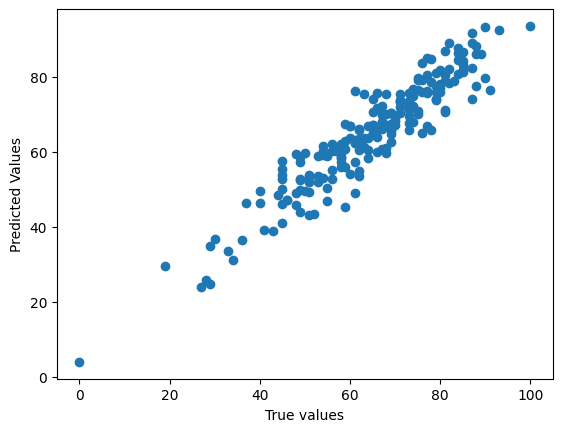

In [66]:
plt.scatter(y_test,y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted Values');

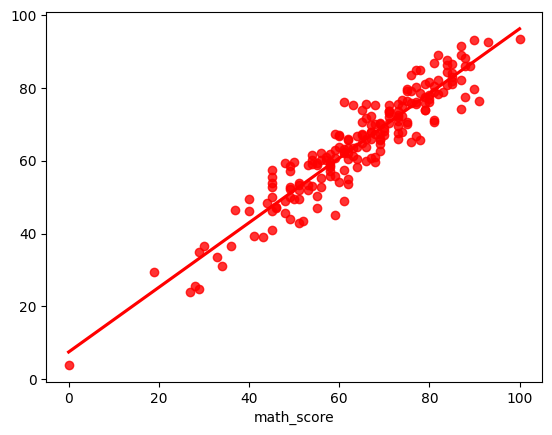

In [67]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

In [68]:
pd.DataFrame(data={'Actual Values':y_test,'Predicted Values':y_pred,'Difference':y_test-y_pred})

,Actual Values,Predicted Values,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504
